In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from loaddatastructs import *
from helperfuncs import *
from plottingfuncs import *

Nicole Recommendations:
- Running same simulation but without ammonia: current results are heavily reliant on nitrate and availabiity of ammonia
  - Answers the question: how sensitive are CCN activity to presence of ammonia? Decoupling conclusions of CCN activity due to SH and emissions composition
  - Start with 100% sulfate aerosol, no ammonia emissions

In [2]:
#matplotlib.rcParams.update({'font.size': 13})

In [2]:
def computeNumConcDiff(scenario, region):
    num_conc = Archive.aero_data[scenario]['TOT_NUM_CONC']

    if region=='lower BL':
        idx_range = np.arange(0,25)
    if region=='above BL':
        idx_range = np.arange(75,100)
    num_conc_avg = num_conc[:, idx_range, :, :].mean(axis=(2,3))
    num_conc_t0 = num_conc_avg[0, :]
    num_conc_diff = num_conc_avg/ num_conc_t0
    return num_conc_diff

def plotTauCoag(scenario, **kwargs):
    
    colors = plt.cm.Set1(np.linspace(0, 1, 9))
    fig, ax = plt.subplots(1,1, figsize=(8, 5.5))

    c=colors[0]
    num_conc_diff = computeNumConcDiff(scenario, region='lower BL')
    for i in np.arange(0, 25):
        label=None
        if i == 0:
            label='Lower BL'
        ax.plot(num_conc_diff[:, i], alpha=.3, c=c,lw=1,label=label)
    c=colors[1]
    num_conc_diff = computeNumConcDiff(scenario, region='above BL')
    for i in np.arange(0, 25):
        label=None
        if i == 0:
            label='Above BL'
        ax.plot(num_conc_diff[:, i], alpha=.5, c=c,lw=1,label=label)


    ax.axhline(1/(np.e), c='k', ls='--')
    ax.axhline(1/(np.sqrt(np.e)), c='k', ls='--')
    ax.axhline(1/(np.e**2), c='k', ls='--')
    ax.set_ylim(0.0, 1)
    ax.set_xlim(0, 36)
    ax.grid()

    ax.text(38, 1/np.sqrt(np.e), '$e^{-1/2}$', fontsize=18, horizontalalignment='center',
        verticalalignment='center',)
    ax.text(38, 1/np.e, '$e^{-1}$', fontsize=18, horizontalalignment='center',
        verticalalignment='center')
    ax.text(38, 1/np.e**2, '$e^{-2}$', fontsize=18, horizontalalignment='center',
        verticalalignment='center')
    
    ax.set_xticks(np.linspace(0, Archive.n_times-1, 7))
    ax.set_xticklabels(Archive.historydelta_m*np.linspace(0, Archive.n_times-1, 7))
    ax.set_xlabel('Time (m)')
    leg = ax.legend()

    for line in leg.get_lines():
        line.set_linewidth(2)
        line.set_alpha(1) 
    
    if kwargs.get('yscale'):
        ax.set_yscale(kwargs.get('yscale'))
    if kwargs.get('ylim'):
        ax.set_ylim(kwargs.get('ylim'))
    if kwargs.get('xscale'):
        ax.set_xscale(kwargs.get('xscale'))
    if kwargs.get('xlim'):
        ax.set_xlim(kwargs.get('xlim'))


    scenarios = Archive.getScenarioList()
    scenarios.insert(3, 'road-10x') # order by sh
    del scenarios[-1]

    scenario_idx = scenarios.index(scenario)
    #plt.savefig(f'./figures/NumConcTimescale_scenario-{scenario_idx}.pdf', format='pdf', bbox_inches='tight')

def plotSHPattern(ax, scenario, gridsize):
    path = f'/data/keeling/a/sf20/b/wrf-partmc-spatial-het/WRFV3/test/em_les/spatial-het/sh-patterns/xres{gridsize}yres{gridsize}'

    ax.set_xticks([])
    ax.set_yticks([])
    filename = f'{scenario}.csv'
    array_path = os.path.join(path, filename)
    cmap = plt.cm.get_cmap('Greys')

    scenario_arr = np.genfromtxt(array_path, delimiter=',')
    scenario_arr = scenario_arr
    ax.pcolormesh(scenario_arr, cmap=cmap, vmin=-.3, vmax=1.3)

In [2]:
Archive.archive_path = '/data/nriemer/d/sf20/les_output/wrf-partmc'
Archive.gridsize = 100

Archive.addScenario(scenario_name='uniform-basecase', slurm_id=1984671)
Archive.addScenario(scenario_name='fx1fy0', slurm_id=1996526)
Archive.addScenario(scenario_name='road-10x', slurm_id=1996525)
Archive.addScenario(scenario_name='point-source-1x1', slurm_id=1984672)

# Scenarios to evaluate ccn activity in complete absence of ammonia
Archive.addScenario(scenario_name='uniform-basecase-no-nh4', slurm_id=2008005)
Archive.addScenario(scenario_name='point-source-1x1-no-nh4', slurm_id=2008006)



In [3]:
data = Archive.aero_data['uniform-basecase']

In [6]:
data.variables.keys()

dict_keys(['Times', 'XLAT', 'XLONG', 'ZNU', 'ZNW', 'U', 'MU_U', 'V', 'MU_V', 'W', 'WW', 'RW', 'T', 'P', 'ALT', 'PB', 'DNW', 'DN', 'Z', 'Z_AT_W', 'MAPFAC_M', 'MAPFAC_U', 'MAPFAC_V', 'MAPFAC_MX', 'MAPFAC_MY', 'MAPFAC_UX', 'MAPFAC_UY', 'MAPFAC_VX', 'MF_VX_INV', 'MAPFAC_VY', 'TAUAER1', 'TAUAER2', 'TAUAER3', 'TAUAER4', 'GAER1', 'GAER2', 'GAER3', 'GAER4', 'WAER1', 'WAER2', 'WAER3', 'WAER4', 'h2so4', 'hno3', 'hcl', 'nh3', 'no', 'no2', 'no3', 'n2o5', 'hono', 'hno4', 'o3', 'o1d', 'O3P', 'oh', 'ho2', 'h2o2', 'co', 'so2', 'ch4', 'c2h6', 'ch3o2', 'ethp', 'hcho', 'ch3oh', 'ANOL', 'ch3ooh', 'ETHOOH', 'ald2', 'hcooh', 'RCOOH', 'c2o3', 'pan', 'aro1', 'aro2', 'alk1', 'ole1', 'api1', 'api2', 'lim1', 'lim2', 'par', 'AONE', 'mgly', 'eth', 'OLET', 'OLEI', 'tol', 'xyl', 'cres', 'to2', 'cro', 'open', 'onit', 'rooh', 'ro2', 'ano2', 'nap', 'xo2', 'xpar', 'isop', 'isoprd', 'isopp', 'isopn', 'isopo2', 'api', 'lim', 'dms', 'msa', 'dmso', 'dmso2', 'ch3so2h', 'ch3sch2oo', 'ch3so2', 'ch3so3', 'ch3so2oo', 'ch3so2ch2o

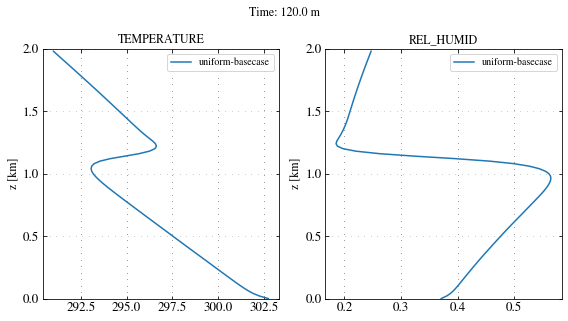

In [10]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase'], variables=['TEMPERATURE', 'REL_HUMID'], time=12)

Latent heat flux $\overline{w'\theta'}$: per the readme, "A sign of well-established
turbulence is that the total (i.e., the resolved-scale plus the
subgrid-scale) heat flux profile should decrease linearly with height
within the CBL."

In [23]:
#data = aerodata_dict['basecase']['aerodata']
data = Archive.aero_data['uniform-basecase']
hflx = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['T'][t, z, :, :] # perturbation potential temperature (relative to 300 K)
        B_data = data['W'][t, z, :, :] # vertical velocity

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        hflx[t, z] = (A_prime*B_prime).mean(axis=(0,1))

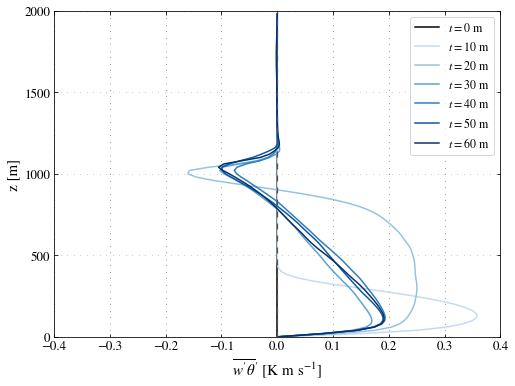

In [55]:
tmax=6
colors = plt.cm.Blues(np.linspace(.1, 1, tmax+1))
fig, ax = plt.subplots(1,1, figsize=(8, 6))

for t in range(tmax+1)[:]:
    if t == 0:
        c = 'k'
    else:
        c = colors[t]    
    ax.plot(hflx[t, :], np.arange(100), label=f'$t={Archive.historydelta_m*t:2.0f}$ m', c=c)
ax.axvline(x=0, c='#505050', ls='--', lw=1.2, zorder=2, dashes=(5, 5))
ax.legend()
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
ax.set_xlim(-.4, .4)
ax.set_ylabel('z [m]', fontsize=15)
ax.set_xlabel("$\\overline{w'\\theta}'\mathrm{\ [K\ m\ s^{-1}]}$", fontsize=15)
ax.legend(fontsize=12)

ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='#414141', alpha=.5)
ax.grid(which = "minor", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='white')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.tick_params(axis='both', labelsize=13, which='major', direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
plt.savefig('heat-flux-profile.pdf', format='pdf', bbox_inches='tight')

TKE

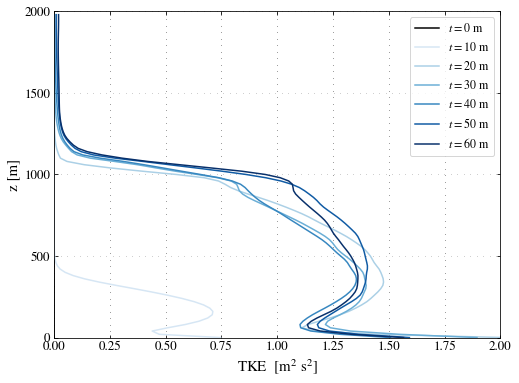

In [56]:
data = Archive.aero_data['uniform-basecase']

fig, ax = plt.subplots(1,1, figsize=(8, 6))
colors = plt.cm.Blues(np.linspace(0, 1, 7))
for t in np.arange(0, 7, 1):
    sigma_u = data['U'][t, :, :, :].std(axis=(1,2))
    sigma_v = data['V'][t, :, :, :].std(axis=(1,2))
    sigma_w = data['W'][t, :, :, :].std(axis=(1,2))[:-1]

    specific_tke = (1/2)*(sigma_u**2 + sigma_v**2 + sigma_w**2) 
    e = np.sqrt(2*specific_tke)

    if t == 0:
        c = 'k'
    else:
        c = colors[t]    
    ax.plot(specific_tke, np.arange(100), label=f'$t = {Archive.historydelta_m*t:3.0f}$ m', c=c)
ax.set_xlim(0, 2)
leg = ax.legend(loc='center', ncol=2, bbox_to_anchor=(.5, .87), handlelength=1)

ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
ax.set_ylabel('z [m]', fontsize=15)
ax.set_xlabel("TKE $\mathrm{\ [m^2\ s^2]}$", fontsize=15)
ax.legend(fontsize=12)

ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='#414141', alpha=.5)
ax.grid(which = "minor", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='white')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.tick_params(axis='both', labelsize=13, which='major', direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
plt.savefig('tke-profile.pdf', format='pdf', bbox_inches='tight')


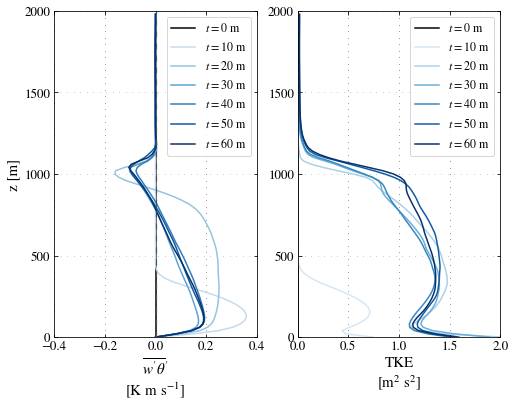

In [70]:
tmax=6
colors = plt.cm.Blues(np.linspace(.1, 1, tmax+1))
fig, axs = plt.subplots(1,2, figsize=(8, 6))

ax = axs[0]
for t in range(tmax+1)[:]:
    if t == 0:
        c = 'k'
    else:
        c = colors[t]    
    ax.plot(hflx[t, :], np.arange(100), label=f'$t={Archive.historydelta_m*t:2.0f}$ m', c=c)
ax.axvline(x=0, c='#505050', ls='--', lw=1.2, zorder=2, dashes=(5, 5))
ax.legend()
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
ax.set_xlim(-.4, .4)
ax.set_ylabel('z [m]', fontsize=15)
ax.set_xlabel("$\\overline{w'\\theta}'$\n$\mathrm{[K\ m\ s^{-1}]}$", fontsize=15)
ax.legend(fontsize=12)

ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='#414141', alpha=.5)
ax.grid(which = "minor", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='white')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.tick_params(axis='both', labelsize=13, which='major', direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
#plt.savefig('heat-flux-profile.pdf', format='pdf', bbox_inches='tight')


ax = axs[1]
colors = plt.cm.Blues(np.linspace(0, 1, 7))
for t in np.arange(0, 7, 1):
    sigma_u = data['U'][t, :, :, :].std(axis=(1,2))
    sigma_v = data['V'][t, :, :, :].std(axis=(1,2))
    sigma_w = data['W'][t, :, :, :].std(axis=(1,2))[:-1]

    specific_tke = (1/2)*(sigma_u**2 + sigma_v**2 + sigma_w**2) 
    e = np.sqrt(2*specific_tke)

    if t == 0:
        c = 'k'
    else:
        c = colors[t]    
    ax.plot(specific_tke, np.arange(100), label=f'$t = {Archive.historydelta_m*t:3.0f}$ m', c=c)
ax.set_xlim(0, 2)
leg = ax.legend(loc='center', ncol=2, bbox_to_anchor=(.5, .87), handlelength=1)

ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
ax.set_yticklabels(np.linspace(0, 2000, 5, dtype=int))
ax.set_ylim(0, Archive.n_levels)
#ax.set_ylabel('z [m]', fontsize=15)
ax.set_xlabel("TKE\n$\mathrm{[m^2\ s^2]}$", fontsize=15)
ax.legend(fontsize=12)

ax.grid(which = "major", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='#414141', alpha=.5)
ax.grid(which = "minor", linewidth = 1, axis='y', ls="dotted", dashes=(.5,6), c='white')
ax.grid(which = "minor", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.grid(which = "major", linewidth = 1, axis='x', ls="dotted", dashes=(.5,6), c='#414141')
ax.tick_params(axis='both', labelsize=13, which='major', direction='in', top=True, right=True, bottom=True, left=True)
ax.tick_params(axis='both', which='minor',direction='in',top=True, right=True, bottom=True, left=True)
#plt.tight_layout()
plt.savefig('heat-flux-and-tke-profile.pdf', format='pdf', bbox_inches='tight')


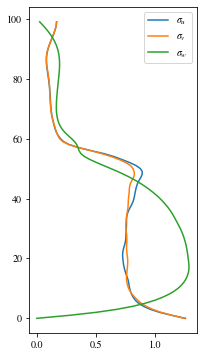

In [11]:
fig, ax = plt.subplots(1,1, figsize=(3, 6))
ax.plot(sigma_u,np.arange(100), label='$\sigma_u$')
ax.plot(sigma_v,np.arange(100), label='$\sigma_v$')
ax.plot(sigma_w,np.arange(100), label='$\sigma_w$')
ax.legend()

Segregation intensity $I_s$

In [ ]:
data = Archive.aero_data['uniform-basecase']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['pmc_NO3'][t, z, :, :]
        B_data = data['pmc_SO4'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.5, vmax=.5, cmap='coolwarm')

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((24, 100))

for t in range(24):
    for z in range(100):
        A_data = data['pmc_NO3'][t, z, :, :]
        B_data = data['pmc_SO4'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.5, vmax=.5, cmap='coolwarm')

In [8]:
scenario = 'point-source-1x1'
variable = 'so2'
nsh_array = calculateNSHTimeSlice(scenario, variable)


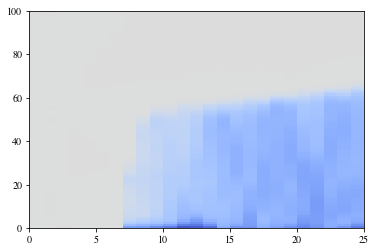

In [5]:
data = Archive.aero_data['point-source-1x1']

Is = np.zeros((25, 100))

for t in range(25):
    for z in range(100):
        A_data = data['so2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.5, vmax=.5, cmap='coolwarm')

In [ ]:
plt.pcolormesh(nsh_array.T)
plt.colorbar()

In [9]:
nsh_arr_flat = nsh_array.flatten()
Is_flat = Is.flatten()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(nsh_arr_flat, Is_flat, s=7)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylabel('$I_s$', fontsize=16)
ax.set_xlabel('$SH_{atmos}}$',fontsize=16)
ax.set_title('$I_s$ (OH & SO$_2$) vs. $SH_{atmos}$ (SO$_2$)', fontsize=18)
#plt.savefig(f'SegIntens_vs_SH_SO2.pdf', format='pdf', bbox_inches='tight')

In [ ]:
scenario = 'point-source-10x10'
variable = 'no2'
nsh_array = calculateNSHTimeSlice(scenario, variable)

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((25, 100))

for t in range(25):
    for z in range(100):
        A_data = data['no2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)


In [ ]:
nsh_arr_flat = nsh_array.flatten()
Is_flat = Is.flatten()

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(nsh_arr_flat, Is_flat, s=7)
ax.tick_params(axis='both', which='major', labelsize=12)
#ax.tick_params(axis='both', which='minor', labelsize=8)
ax.set_ylabel('$I_s$', fontsize=16)
ax.set_xlabel('$SH_{atmos}}$',fontsize=16)
ax.set_title('$I_s$ (OH & NO$_2$) vs. $SH_{atmos}$ (NO$_2$)', fontsize=18)
plt.savefig(f'SegIntens_vs_SH_NO2.pdf', format='pdf', bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,6))
c = ax.pcolormesh(1000*basecase_data['so2'][16, 25, :, :])
plt.colorbar(c, ax=ax)

In [ ]:
data = Archive.aero_data['point-source-10x10-tchem60']
fig, ax = plt.subplots(1, 1, figsize=(7,6))
#vmin = 0.1
#vmax=12
c = ax.pcolormesh(1000*data['oh'][24, 25, :, :], )#vmin=0, vmax=12)
#norm=mplcolors.LogNorm(vmin, vmax))
plt.colorbar(c, ax=ax)

In [ ]:
data = Archive.aero_data['uniform-basecase']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['no2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['no2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
data = aerodata_dict['basecase']['aerodata']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['so2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
data = Archive.aero_data['point-source-10x10']

Is = np.zeros((24, 100))
for t in range(24):
    for z in range(100):
        A_data = data['so2'][t, z, :, :]
        B_data = data['oh'][t, z, :, :]

        A_mean = A_data.mean(axis=(0,1))
        B_mean = B_data.mean(axis=(0,1))
        A_prime = A_data - A_mean
        B_prime = B_data - B_mean

        Is[t, z] = (A_prime*B_prime).mean(axis=(0,1))/(A_mean*B_mean)

plt.pcolormesh(Is.T, vmin=-.2, vmax=.2, cmap='coolwarm')

In [ ]:
fig, ax  = plt.subplots(1,1, figsize=(8,5.5))

variable = 'ccn_006' #'TOT_COAGULATION_NUM_CONC'
scenarios = [
             'basecase', 
             'point-source-10x10', 
             'point-source-10x10-tchem60'
             ]
mixingratio = True
zlevel = 25

for scenario in scenarios:
    times = np.arange(n_times)
    varmean_array = np.zeros((n_times))
    varstd_array = np.zeros((n_times))
    for itime in times:
        if mixingratio:
            inverse_airdens = aerodata_dict[scenario]['aerodata']['ALT'][itime, zlevel, :, :]
            level_array = inverse_airdens*aerodata_dict[scenario]['aerodata'][variable][itime, zlevel, :, :]
        else:
            level_array = aerodata_dict[scenario]['aerodata'][variable][itime, zlevel, :, :]
        if variable in gas_vars:
            level_array = 1000*level_array
            if variable == 'oh':
                level_array = 1000*level_array
        varmean_array[itime] = level_array.mean()
        varstd_array[itime] = level_array.std()
        

    ax.plot(times, varmean_array, label = scenario)
    ax.fill_between(times, varmean_array-varstd_array, varmean_array+varstd_array, alpha=.3)

if mixingratio:
    var_units = 'Mixing Ratio'
else:
    var_units = 'Concentration'

#cbar = fig.colorbar(cs, label=f'{variable} {var_units}')
ax.legend(loc='upper left')
ax.set_xlabel('Time (mins)', fontsize=12)
ax.set_ylabel(f'{var_units}', fontsize=12)
ax.set_xticks(np.linspace(0, n_times-1, 13))
ax.set_xticklabels(5*np.linspace(0, n_times-1, 13))
#ax.set_yticks(np.arange(0, n_levels+1, 25))
#ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
#ax.set_yscale('log')
ax.set_title(f'{variable}')
plt.suptitle(f'Z-level: {zlevel}')
plt.tight_layout()


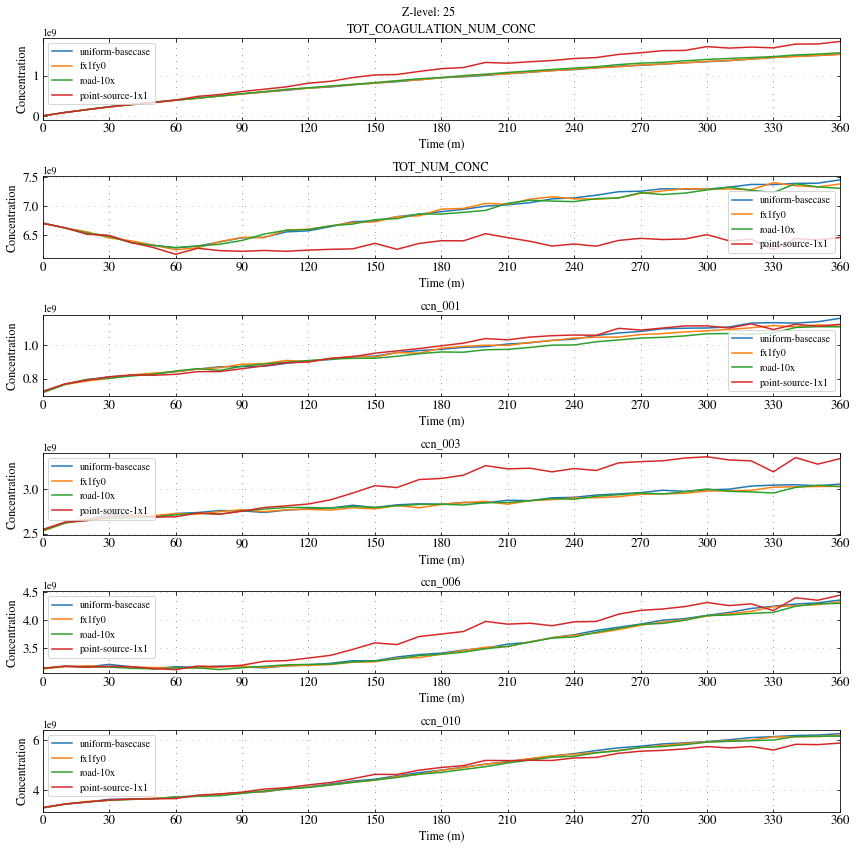

In [3]:
scenarios = [
             'uniform-basecase', 
             'fx1fy0',
             'road-10x',
             'point-source-1x1'
             #'point-source-10x10', 
             #'point-source-10x10-tchem60'
             ]
variables = ['TOT_COAGULATION_NUM_CONC', 'TOT_NUM_CONC',
'ccn_001', 'ccn_003', 'ccn_006', 'ccn_010']
mixingratio = False
zlevel = 25
plotScenariosVarsLevelConc(scenarios, variables, zlevel, mixingratio,
                           subplot_height=2,
                           #general_scenario_label=True
                           #xtick_delta_t=1, xtick_units='h')
                            )

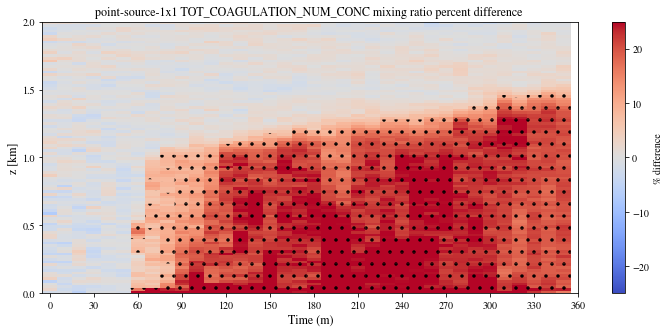

In [3]:
variable = 'TOT_COAGULATION_NUM_CONC'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-25, vmax=25, skip_t0=True,
                   mixingratio=True, plot_significance=True)

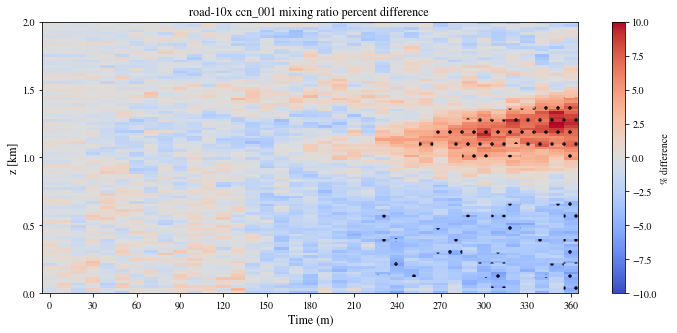

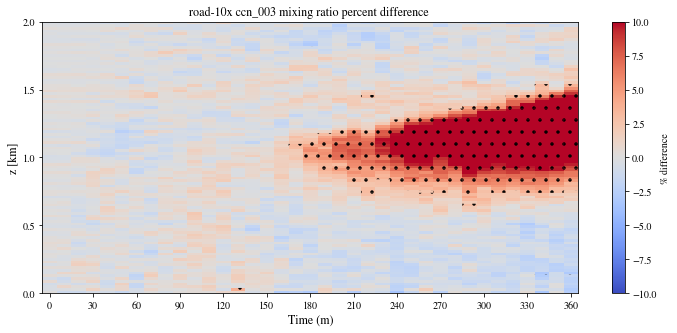

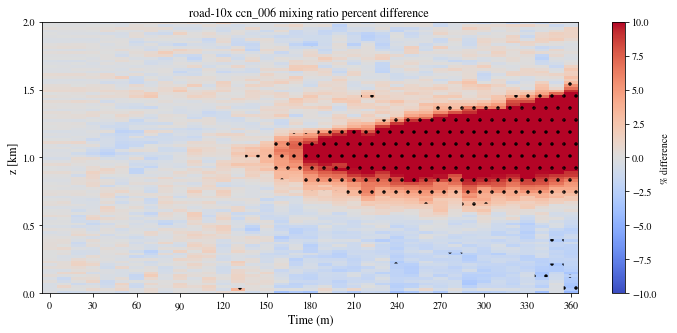

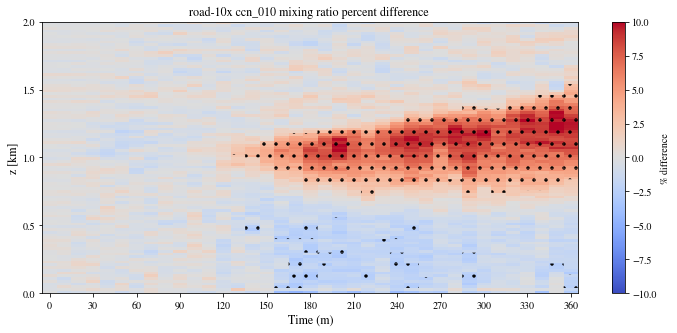

In [19]:
scenario = 'road-10x'
#scenario = 'point-source-1x1'

variable = 'ccn_001'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True, 
                   #xtick_units='h', xtick_delta_t=1
                   )

variable = 'ccn_003'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

variable = 'ccn_006'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

variable = 'ccn_010'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

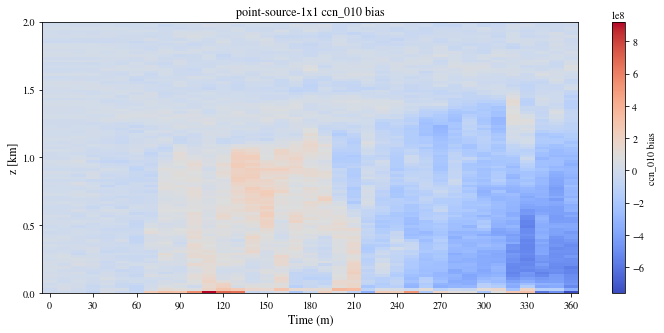

In [15]:
plotVarBias('point-source-1x1', 'ccn_010')

In [ ]:
variable = 'ccn_001'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)

variable = 'ccn_003'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)    

variable = 'ccn_006'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)

variable = 'ccn_010'
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True)

Less OH to react with H2SO4, reacting with many VOCs

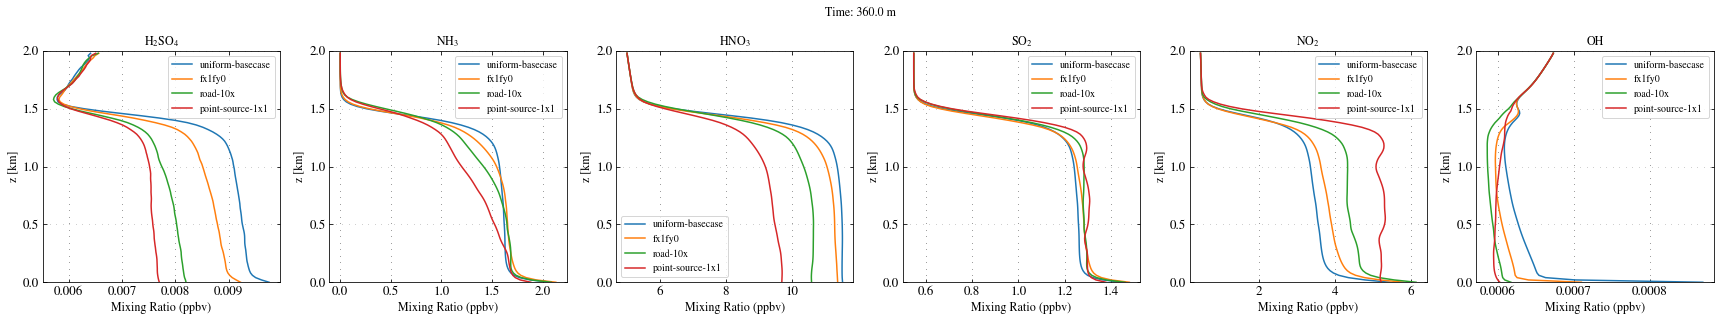

In [4]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'#'point-source-10x10', 'point-source-10x10-tchem60', 
                                            ], variables=['h2so4', 'nh3', 'hno3', 'so2', 'no2', 'oh'], time=36,
                                            #general_scenario_label=True
                                            )

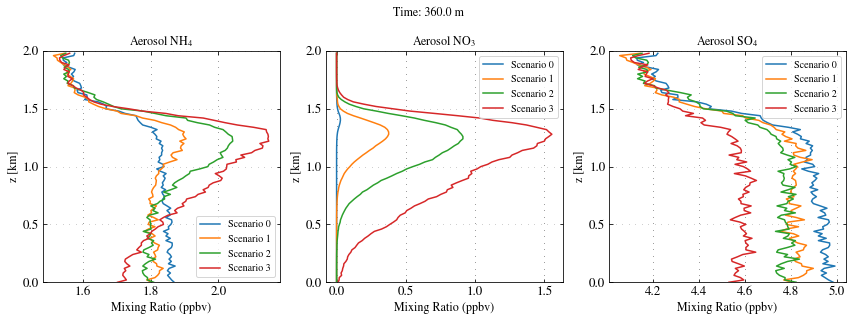

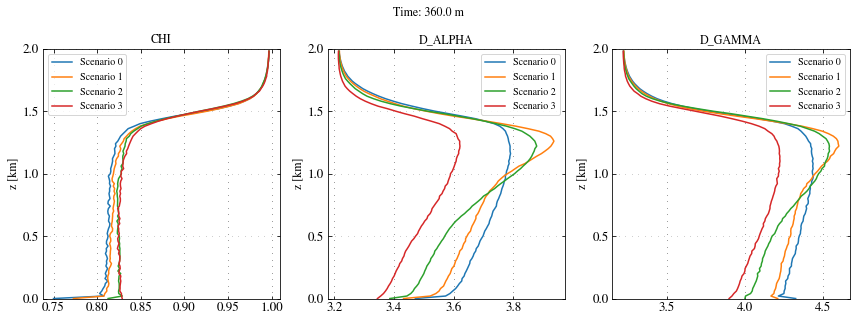

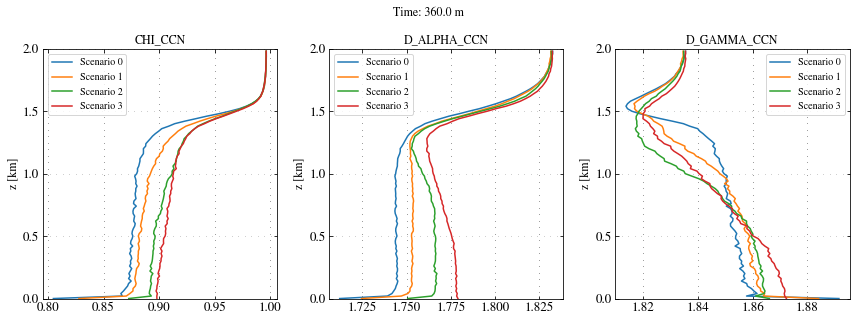

In [4]:
t = 36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['pmc_NH4', 'pmc_NO3', 'pmc_SO4', #'pmc_H2O', 
                                                                                          #'pmc_ARO1'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 )

plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['CHI', 'D_ALPHA', 'D_GAMMA'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 )
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'
                                            ], variables=['CHI_CCN', 'D_ALPHA_CCN', 'D_GAMMA_CCN'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=True,
                                 )

$D_{\gamma}$: bulk diversity (how many species are there in the bulk population)
$D_{\alpha}$: per-particle diversity (how many species are in each particle)

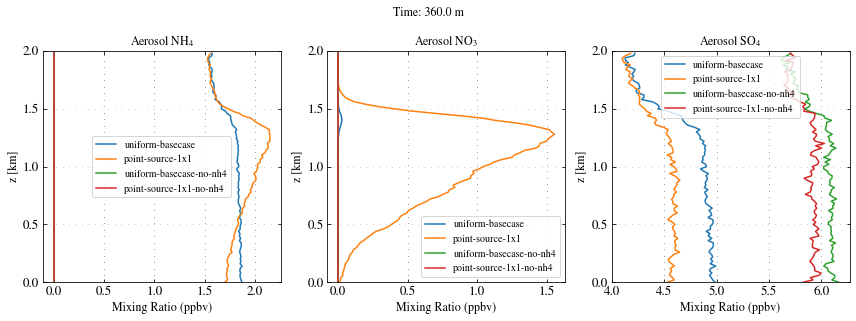

In [4]:
t = 36
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'point-source-1x1', 'uniform-basecase-no-nh4', 'point-source-1x1-no-nh4'
                                            ], variables=['pmc_NH4', 'pmc_NO3', 'pmc_SO4', #'pmc_H2O', 
                                                                                          #'pmc_ARO1'
                                                                                          ], 
                                 time=t, 
                                 general_scenario_label=False,
                                 )

Also show total number concentration on these vertical profiles of CCN

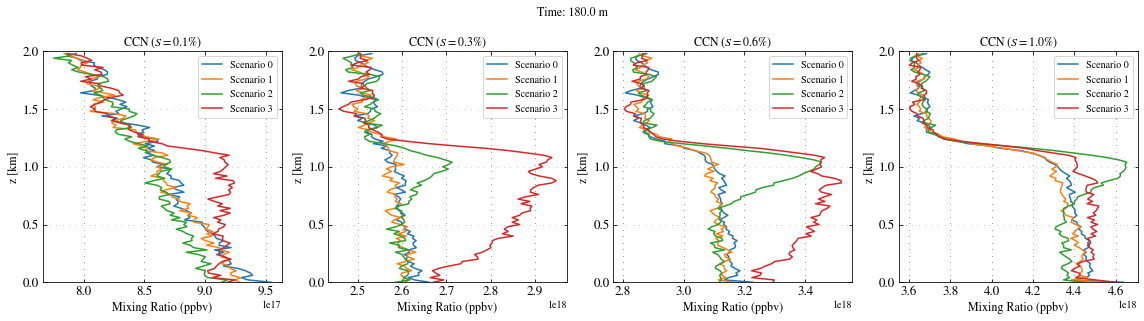

In [32]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'#'point-source-10x10','point-source-10x10-tchem60', 
                                            ], variables=['ccn_001', 'ccn_003', 'ccn_006', 'ccn_010'
                                                                                          ], 
                                 time=18, 
                                 general_scenario_label=True
                                 )

This show that **the impact of spatial heterogeneity on CCN activity is highly sensitive to the composition of the aerosol and gas-phase**. The presence of ammonia amplifies this phenomenon, as we can see considerable differences between the activity of ccn in the uniform basecase (blue) compared with the point source 1x1 (orange), whereas comparable simulations without any ammonia exhibit far less difference in ccn activity at each supersaturation level. 

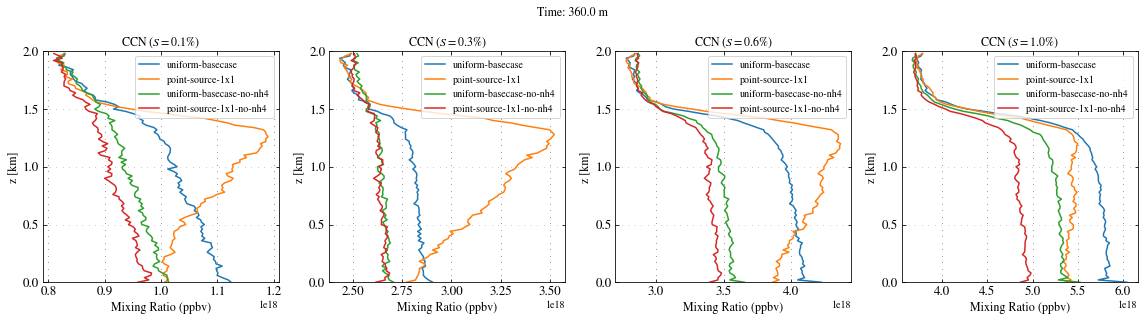

In [7]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'point-source-1x1', 'uniform-basecase-no-nh4', 'point-source-1x1-no-nh4'
                                            ], variables=['ccn_001', 'ccn_003', 'ccn_006', 'ccn_010'
                                                                                          ], 
                                 time=36, 
                                 general_scenario_label=False
                                 )

Text(0.5, 1.0, 'CCN activating b/w 0.6-1.0%')

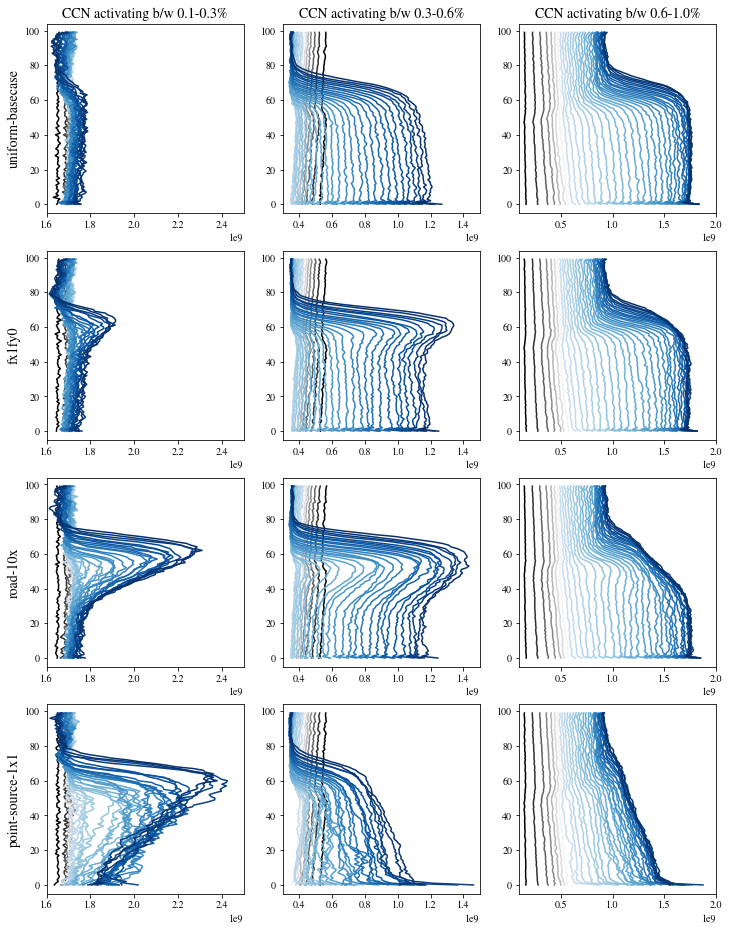

In [107]:

scenarios = ['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1']
fig, ax = plt.subplots(len(scenarios), 3, figsize=(12, len(scenarios)*4))
colors = plt.cm.Blues(np.linspace(.05, 1, 36))
ic_colors = plt.cm.Greys_r(np.linspace(0, .9, 7))
for i, scenario in enumerate(scenarios):
    for (c, time) in zip(colors, np.arange(36)):
        if time > 6:
            inverse_airdens = Archive.aero_data[scenario]['ALT'][time, :, :, :]

            ccn_003_001_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_003'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_001'][time, :, :, :]).mean(axis=(1,2))
            ccn_006_003_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_006'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_003'][time, :, :, :]).mean(axis=(1,2))
            ccn_010_006_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_010'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_006'][time, :, :, :]).mean(axis=(1,2))

            alpha = time/36
            ax[i, 0].plot(ccn_003_001_diff, np.arange(100), label='0.1-0.3%', c=colors[time])
            ax[i, 1].plot(ccn_006_003_diff, np.arange(100), label='0.3-0.6%',  c=colors[time])
            ax[i, 2].plot(ccn_010_006_diff, np.arange(100), label='0.6-1.0%',  c=colors[time])
        else:
            inverse_airdens = Archive.aero_data[scenario]['ALT'][time, :, :, :]

            ccn_003_001_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_003'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_001'][time, :, :, :]).mean(axis=(1,2))
            ccn_006_003_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_006'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_003'][time, :, :, :]).mean(axis=(1,2))
            ccn_010_006_diff = (inverse_airdens*Archive.aero_data[scenario]['ccn_010'][time, :, :, :] -inverse_airdens*Archive.aero_data[scenario]['ccn_006'][time, :, :, :]).mean(axis=(1,2))

            alpha = 1- 4*time/36
            ax[i, 0].plot(ccn_003_001_diff, np.arange(100), label='0.1-0.3%', c=ic_colors[time])
            ax[i, 1].plot(ccn_006_003_diff, np.arange(100), label='0.3-0.6%', c=ic_colors[time])
            ax[i, 2].plot(ccn_010_006_diff, np.arange(100), label='0.6-1.0%', c=ic_colors[time])
    
    ax[i, 0].set_xlim(1.6e9, 2.5e9)
    ax[i, 1].set_xlim(.3e9, 1.5e9)
    ax[i, 2].set_xlim(1e8, 2e9)
    ax[i, 0].set_ylabel(f'{scenario}', fontsize=14)
ax[0, 0].set_title('CCN activating b/w 0.1-0.3%', fontsize=14)
ax[0, 1].set_title('CCN activating b/w 0.3-0.6%', fontsize=14)
ax[0, 2].set_title('CCN activating b/w 0.6-1.0%', fontsize=14)
#plt.legend()
#plt.xscale('log')

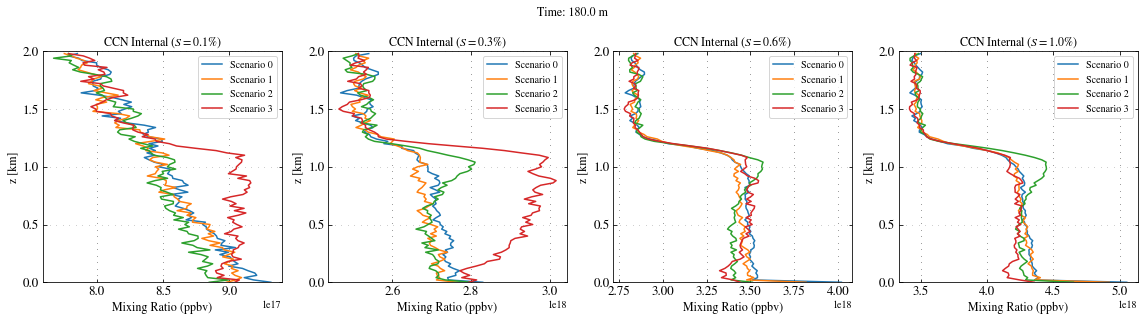

In [24]:
plotScenariosVarsVerticalProfile(scenarios=['uniform-basecase', 'fx1fy0', 'road-10x', 'point-source-1x1'#'point-source-10x10','point-source-10x10-tchem60', 
                                            ], variables=['ccn_internal_001', 'ccn_internal_003', 'ccn_internal_006','ccn_internal_010'
                                                                                          ], 
                                 time=18, 
                                 general_scenario_label=True
                                 )

In [ ]:
plotZT(scenario='uniform-basecase', variable='pmc_NO3', vmin=1e-15, vmax=1e-9, lognorm=True,
       xtick_delta_t=1, xtick_units='h')

In [ ]:
plotZT(scenario='point-source-1x1', variable='pmc_NO3', vmin=1e-15, vmax=1e-9, lognorm=True)

In [ ]:
plotZT(scenario='point-source-10x10-tchem60', variable='pmc_NO3', vmin=1e-15, vmax=1e-10, lognorm=True)

In [ ]:
plotZT(scenario='uniform-basecase', variable='pmc_SO4', vmin=3.2e-9, vmax=4.1e-9)

In [ ]:
plotZT(scenario='point-source-1x1', variable='pmc_SO4',vmin=3.2e-9, vmax=4.1e-9)

In [ ]:
plotZT(scenario='basecase', variable='pmc_NH4', vmin=1.2e-9, vmax=1.55e-9)

In [ ]:
plotZT(scenario='point-source-10x10', variable='pmc_NH4',vmin=1.2e-9, vmax=1.55e-9)

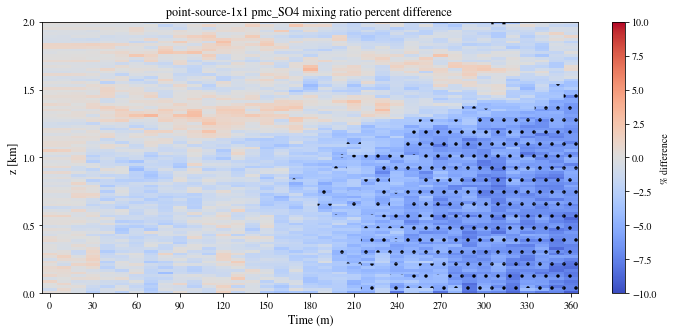

In [30]:
variable = 'pmc_SO4'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

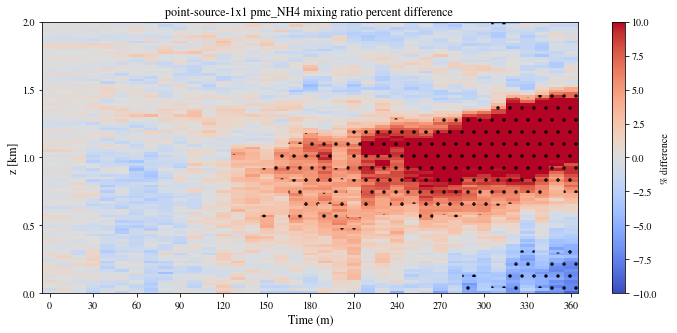

In [29]:
variable = 'pmc_NH4'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, plot_significance=True)

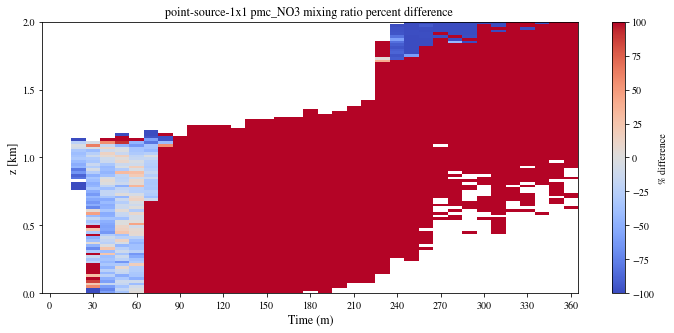

In [27]:
variable = 'pmc_NO3'
scenario = 'point-source-1x1'
plotVarPercentDiff(scenario, variable, vmin=-100, vmax=100, 
                   mixingratio=True)


In [ ]:
def plotVarPercentDiffContour(scenario, variable, vmin=None, vmax=None, mixingratio=False, skip_t0=False, **kwargs):
    
    rel_diff = calculateVarPercentDiff(scenario, variable, mixingratio, skip_t0)
    
    ax = kwargs.get('ax', None)
    cmap = kwargs.get('cmap', None)
    if not cmap:
        cmap = plt.cm.coolwarm
    else:
        cmap = plt.get_cmap(cmap)
    
    if not ax:
        print('setting ax')
        fig, ax  = plt.subplots(1,1, figsize=(12,5))
    cs = ax.contourf(rel_diff.T, cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(cs, label=f'{variable} percent difference', ax=ax)

    ax.set_xlabel('Time (mins)', fontsize=12)
    ax.set_ylabel('z [km]', fontsize=12)
    ax.set_xticks(np.linspace(0, Archive.n_times-1, 13))
    ax.set_xticklabels(5*np.linspace(0, Archive.n_times-1, 13))
    ax.set_yticks(np.arange(0, Archive.n_levels+1, 25))
    ax.set_yticklabels(np.linspace(0, 2, 5).round(2))
    if mixingratio:
        mixingratio_str = 'mixing ratio '
    else:
        mixingratio_str = ''
    ax.set_title(f'{scenario} {variable} {mixingratio_str}percent difference ')
    contourmax = kwargs.get('contour_max', 15)
    contourmin = kwargs.get('contour_min', -15)
    ncontours = kwargs.get('n_contours', 9)
    contour_levels = [x for x in np.linspace(contourmin,contourmax, ncontours) if x!= 0]
    CS = ax.contour(rel_diff.T, levels=contour_levels, cmap='gist_gray_r')
    ax.clabel(CS, inline=True, fontsize=13)
    plt.tight_layout()

In [ ]:
scenario = 'point-source-1x1'
plotVarPercentDiffContour(scenario, variable, vmin=-8, vmax=8, 
                   mixingratio=True,contour_max=8, contour_min=-8, n_contours=7,#ax=ax[1], 
                   cmap='coolwarm')

In [ ]:
fig, ax  = plt.subplots(2,1, figsize=(12,8))
variable = 'ccn_006'
                          
scenario = 'point-source-10x10-tchem60'
plotVarPercentDiffContour(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True, contour_max=15, contour_min=-15, n_contours=7, ax=ax[0], cmap='coolwarm')

scenario = 'point-source-10x10'
plotVarPercentDiffContour(scenario, variable, vmin=-10, vmax=10, 
                   mixingratio=True,contour_max=15, contour_min=-15, n_contours=7,ax=ax[1], cmap='coolwarm')

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-1x1'
plotNSHPercentDiff(scenario, variable, vmin=-1000, vmax=1000)

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-10x10-tchem60'
plotNSHPercentDiff(scenario, variable, vmin=-1000, vmax=1000)

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-1x1'
plotZT(scenario, variable, vmin=5e-7, vmax=2e-6, lognorm=True)

In [ ]:
variable = 'oh'
                        
scenario = 'point-source-10x10-tchem60'
plotZT(scenario, variable, vmin=5e-7, vmax=2e-6, lognorm=True)

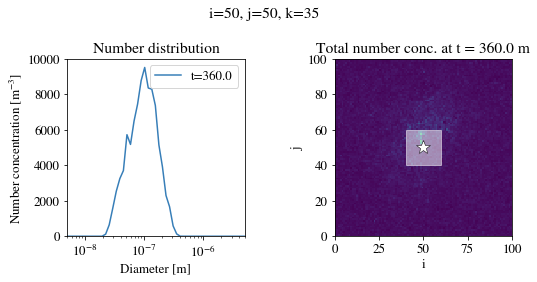

In [17]:
scenario = 'point-source-1x1'
i,j,k = 50, 50, 35
plotNumberDist(scenario, i, j, k, times=[36], 
               ylims=(0, 10000), cmap='Set1',
               local_binning=10)

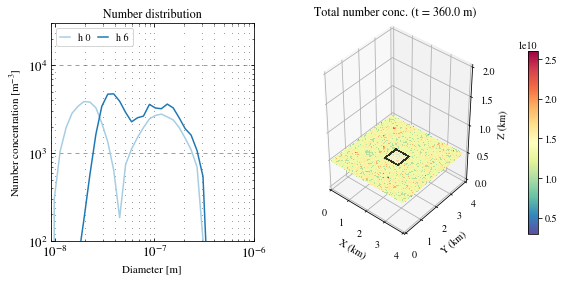

In [26]:
scenario = 'uniform-basecase'
i,j,k = 50, 50, 25
dist_type = 'num'
plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                      dist_cmap='Paired', dist_cmap_norm_range=(0,.15),
                      times = [0, 36],
                      xlims=(9e-9, 1e-6),
                      ylims=(100, 30000), yscale='log',
                      field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                      #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                      local_binning=8, subset_marker='.')

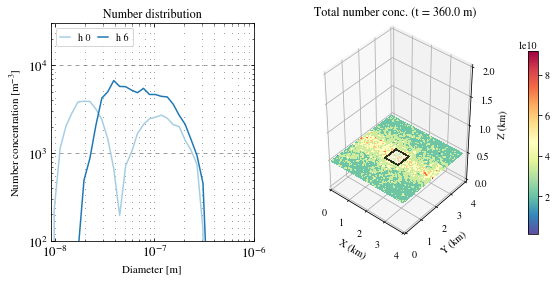

In [25]:
scenario = 'road-10x'
i,j,k = 50, 50, 25
dist_type = 'num'
plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                      dist_cmap='Paired', dist_cmap_norm_range=(0,.15),
                      times = [0, 36],
                      xlims=(9e-9, 1e-6),
                      ylims=(100, 30000), yscale='log',
                      field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                      #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                      local_binning=8, subset_marker='.')

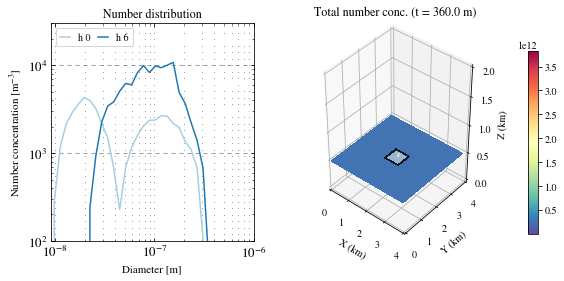

In [24]:
scenario = 'point-source-1x1'
i,j,k = 50, 50, 25
dist_type = 'num'
plotDistand3DCrossSec(scenario, i, j, k, dist_type, 
                      dist_cmap='Paired', dist_cmap_norm_range=(0,.15),
                      times = [0, 36],
                      xlims=(9e-9, 1e-6),
                      ylims=(100, 30000), yscale='log',
                      field_var='TOT_NUM_CONC', field_title='Total number concentration ($m^{-3}$)',
                      #field_var='ccn_001', field_title='CCN ($S=0.01\%$)',
                      local_binning=8, subset_marker='.')

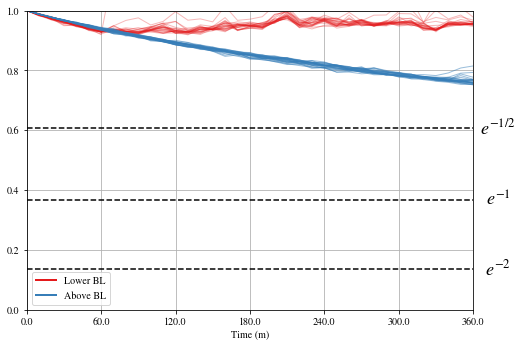

In [11]:
plotTauCoag('point-source-1x1')

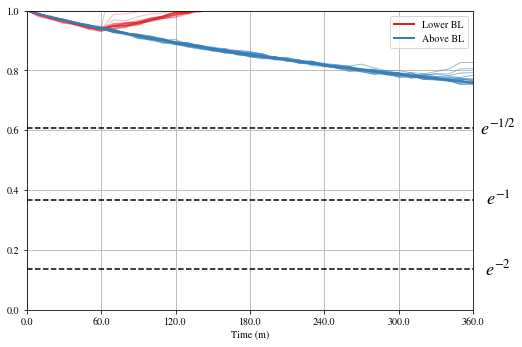

In [12]:
plotTauCoag('uniform-basecase')

In [24]:
scenarios = Archive.getScenarioList()
for scenario in scenarios:
    nsh_scenario = calculateNSHTimeSlice(scenario, variable='ch4')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


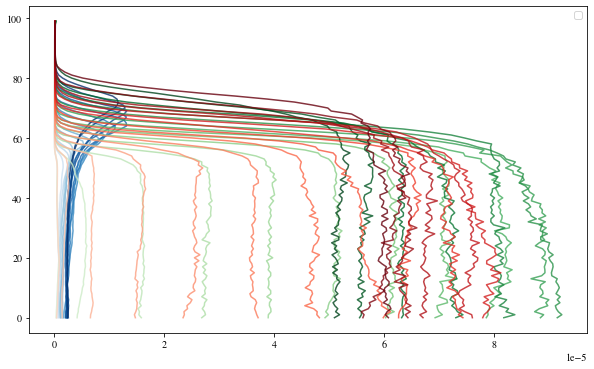

In [29]:

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
for scenario in scenarios:
    if scenario == 'uniform-basecase':
        colors = plt.cm.Blues(np.linspace(0, 1, Archive.n_times))
    if scenario == 'road-10x':
        colors = plt.cm.Greens(np.linspace(0, 1, Archive.n_times))
    if scenario == 'point-source-1x1':
        colors = plt.cm.Reds(np.linspace(0, 1, Archive.n_times))
    for i in range(Archive.n_times)[::2]:
        if i < 6:
            continue
        vertical_slice = Archive.nsh_dict[scenario]['ch4'][i, :]
        ax.plot(vertical_slice, np.arange(100),c=colors[i], alpha=.8)#label=scenario)
    plt.legend()
    #plt.xscale('log')

so2 not in NSH dictionary for point-source-1x1, calculating


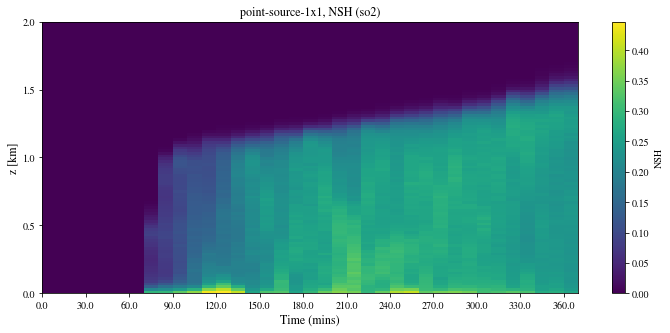

In [3]:
plotNSH(scenario='point-source-1x1', variable='so2')

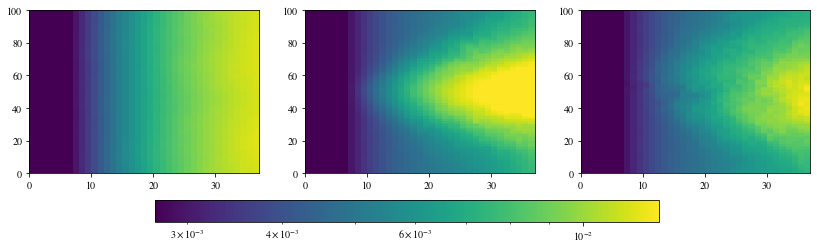

In [137]:
fig, ax = plt.subplots(1, 3, figsize=(14,3))

var = 'hno3'
#var = 'nh3'
#var = 'so2'
#var='h2so4'
#var = 'oh'
#var = 'pmc_NO3'
#var = 'pmc_NH4'
#var = 'pmc_SO4'

z = 25

s0_data = Archive.aero_data['uniform-basecase'][var]
s1_data = Archive.aero_data['road-10x'][var]
s2_data = Archive.aero_data['point-source-1x1'][var]

vmin = s0_data[6:, z, :, :].mean(axis=1).min()
vmax = s2_data[6:, z, :, :].mean(axis=1).max()#*.7

if vmin == 0:
    vmin = 1e-12

ax[0].pcolormesh(s0_data[:, z, :, :].mean(axis=1).T, norm = mplcolors.LogNorm(vmin, vmax)
                 )

ax[1].pcolormesh(s1_data[:, z, :, :].mean(axis=2).T, norm = mplcolors.LogNorm(vmin, vmax)
                 )

c= ax[2].pcolormesh(s2_data[:, z, :, :].mean(axis=1).T, norm = mplcolors.LogNorm(vmin, vmax)
                 #norm = mplcolors.LogNorm(5.8e-4, 2.7e-3)
                 )

cbar_ax = fig.add_axes([0.25, -0.1, 0.5, 0.1])
fig.colorbar(c, cax=cbar_ax, orientation='horizontal')
